<a href="https://colab.research.google.com/github/IrinaS-D/Economic-data-analysis/blob/main/Numerical_Methods_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1
(completed by Irina Sucoverschi)

This challenge is based on the S&P 500 stock index model authored by Ligita Gaspareniene, Rita Remeikiene, Aleksejus Sosidko, Vigita Vebraite from Vilnius University and the Mykolas Romeris University in
Lithuania. The model was described in their paper: **Modelling of S&P 500 Index Price Based on U.S. Economic Indicators: Machine
Learning Approach** (http://dx.doi.org/10.5755/j01.ee.32.4.27985).
The purpose of their article was to model the monthly price of the S&P 500 index based
on U.S. economic indicators using statistical, machine learning, deep learning approaches and finally compare metrics of
those models. After the selection of indicators according to the data visualization, multicollinearity tests, statistical
significance tests, 3 out of 27 indicators remained: the 3-month Treasury bill, WTI and personal savings.
The defined purpose of the paper was detailed into the following objectives:

*   to categorize most influential indicators affecting the stock market performance;
*   to select and substantiate methods of the research;
*   to model the S&P 500 index price based on U.S. economic indicators using statistical, machine learning, deep learning methods.


In this challenge our goal will be to try to replicate the authors' linear regression analysis. The machine learning methods and results are out of scope.

**Importance:**
Composed of 500 U.S. largest companies operating in key
industries, the S&P 500 is considered to be one of the most
influential indicators reflecting and even determining the
movements in the U.S. stock market. The stocks included
in the index account for about 80 percent of the total U.S.
stock market capitalization, and since a large proportion of
U.S. corporations operate globally, fluctuations in the
index value can as well cause the changes in equity
markets worldwide, especially the ones most tied to the
U.S. economy. Therefore, a deeper notion of the S&P 500
value determinants can help more accurately forecast
prospective stock market returns (losses).

In [1]:
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

start = dt.datetime(1970, 2, 1)
end = dt.datetime(2023, 9, 1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1: Extract and clean data

**SOURCES**

FRED for:

*   3-month treasury bills (https://fred.stlouisfed.org/series/TB3MS);
*   WTI (https://fred.stlouisfed.org/series/WTISPLC);
*   personal savings (https://fred.stlouisfed.org/series/PMSAVE).
Statology.com for:
*   S&P 500 (https://www.investing.com/indices/us-spx-500-historical-data).

Data was extracted and then normalized, to match the data extraction and cleaning process from the article.

In [3]:
TB3 = web.DataReader('TB3MS','fred',start,end)
TB3

,TB3MS
DATE,
1970-02-01,7.13
1970-03-01,6.63
1970-04-01,6.51
1970-05-01,6.84
1970-06-01,6.68
...,...
2023-05-01,5.14
2023-06-01,5.16
2023-07-01,5.25


In [4]:
TB3_norm = (TB3-TB3.min())/(TB3.max()-TB3.min())
#(df-df.min())/(df.max()-df.min())
TB3_norm

,TB3MS
DATE,
1970-02-01,0.437078
1970-03-01,0.406384
1970-04-01,0.399018
1970-05-01,0.419276
1970-06-01,0.409454
...,...
2023-05-01,0.314917
2023-06-01,0.316145
2023-07-01,0.321670


In [5]:
TB3_norm = (TB3-TB3.min())/(TB3.max()-TB3.min())
TB3_norm

,TB3MS
DATE,
1970-02-01,0.437078
1970-03-01,0.406384
1970-04-01,0.399018
1970-05-01,0.419276
1970-06-01,0.409454
...,...
2023-05-01,0.314917
2023-06-01,0.316145
2023-07-01,0.321670


In [6]:
WTI = web.DataReader('WTISPLC', 'fred', start,end)
WTI

,WTISPLC
DATE,
1970-02-01,3.35
1970-03-01,3.35
1970-04-01,3.35
1970-05-01,3.35
1970-06-01,3.35
...,...
2023-05-01,71.58
2023-06-01,70.25
2023-07-01,76.07


In [7]:
WTI_norm =(WTI-WTI.min())/(WTI.max()-WTI.min())
WTI_norm

,WTISPLC
DATE,
1970-02-01,0.000306
1970-03-01,0.000306
1970-04-01,0.000306
1970-05-01,0.000306
1970-06-01,0.000306
...,...
2023-05-01,0.522661
2023-06-01,0.512479
2023-07-01,0.557036


In [8]:
savings = web.DataReader('PMSAVE', 'fred', start,end)
savings

,PMSAVE
DATE,
1970-02-01,86.1
1970-03-01,92.4
1970-04-01,100.3
1970-05-01,93.2
1970-06-01,92.7
...,...
2023-05-01,1060.0
2023-06-01,980.1
2023-07-01,890.7


In [9]:
savings_norm = (savings-savings.min())/(savings.max()-savings.min())
savings_norm

,PMSAVE
DATE,
1970-02-01,0.000000
1970-03-01,0.001070
1970-04-01,0.002411
1970-05-01,0.001205
1970-06-01,0.001120
...,...
2023-05-01,0.165340
2023-06-01,0.151775
2023-07-01,0.136597


###S&P 500
The data sets from FRED or Yfinance were incomplete. Upon further research, the data set from investing.com provided the required range.

The data was processed as follows:


*   only the price column was preserved (https://www.statology.org/pandas-keep-columns/);
*   I needed to use loc[] to reverse sort the rows, to match the ordering of the independent variables;
*   I then use iloc[] to drop last 2 rows, so last datapoint (for 10/01/2023) matches other data (to have 644 rows);
* to align index with other datasets, to start at 0, I use `.reset_index(drop=True) in a subsequent cell.

In [10]:
import pandas as pd
import re

sp500 = pd.read_csv(
        "https://drive.google.com/u/0/uc?id=1gCDH7t46-FPXrnjCAAQ6rXrVVW8k5sV5&export=download",
        usecols=['Price'],
        converters={'Price': lambda x: float(re.sub(',', '', x))}
    ).loc[::-1].reset_index(drop=True).iloc[:-2,:]

sp500

,Price
0,89.50
1,89.63
2,81.52
3,76.55
4,72.72
...,...
639,4179.83
640,4450.38
641,4588.96
642,4507.66


In [11]:
sp500_norm =(sp500-sp500.min())/(sp500.max()-sp500.min())
sp500_norm

,Price
0,0.005520
1,0.005548
2,0.003823
3,0.002767
4,0.001952
...,...
639,0.875315
640,0.932846
641,0.962315
642,0.945027


### Step 2: Create dataframe

In this step, the normalized values of the 3 independent variables were joined in one dataframe.

The data was visualized and I created scatter plots of all possible combinations. This may be used for exploratory analysis.


In [12]:
#join the 3 independent variables into one dataframe

X = None
X = pd.DataFrame(TB3_norm['TB3MS'])
X = X.join(WTI_norm['WTISPLC'])
X

,TB3MS,WTISPLC
DATE,,
1970-02-01,0.437078,0.000306
1970-03-01,0.406384,0.000306
1970-04-01,0.399018,0.000306
1970-05-01,0.419276,0.000306
1970-06-01,0.409454,0.000306
...,...,...
2023-05-01,0.314917,0.522661
2023-06-01,0.316145,0.512479
2023-07-01,0.321670,0.557036


In [13]:
X = X.join(savings_norm['PMSAVE'])
X

,TB3MS,WTISPLC,PMSAVE
DATE,,,
1970-02-01,0.437078,0.000306,0.000000
1970-03-01,0.406384,0.000306,0.001070
1970-04-01,0.399018,0.000306,0.002411
1970-05-01,0.419276,0.000306,0.001205
1970-06-01,0.409454,0.000306,0.001120
...,...,...,...
2023-05-01,0.314917,0.522661,0.165340
2023-06-01,0.316145,0.512479,0.151775
2023-07-01,0.321670,0.557036,0.136597


<Axes: xlabel='DATE'>

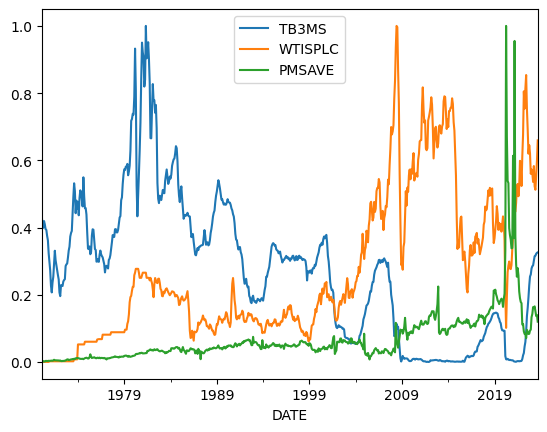

In [14]:
X.plot()

In [15]:
X.describe()

,TB3MS,WTISPLC,PMSAVE
count,644.000000,644.000000,644.000000
mean,0.271385,0.268175,0.068814
std,0.209009,0.219872,0.088095
min,0.000000,0.000000,0.000000
25%,0.080878,0.108291,0.026904
50%,0.289134,0.194936,0.045312
75%,0.383671,0.410676,0.087729
max,1.000000,1.000000,1.000000


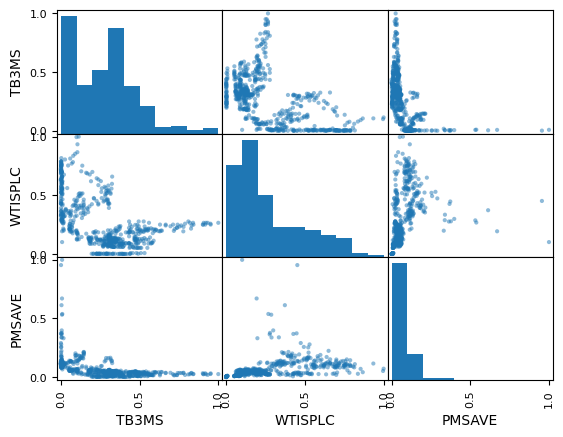

In [16]:
pd.plotting.scatter_matrix(X);

Each data set had different date formats. This is where I reset to integer-index, in order to avoid converting dates.


In [17]:
# To use statsmodel with dataframes, see:
# https://datatofish.com/statsmodels-linear-regression/
X = X[['TB3MS', 'WTISPLC', 'PMSAVE']]

X = X.reset_index(drop=True)

X

,TB3MS,WTISPLC,PMSAVE
0,0.437078,0.000306,0.000000
1,0.406384,0.000306,0.001070
2,0.399018,0.000306,0.002411
3,0.419276,0.000306,0.001205
4,0.409454,0.000306,0.001120
...,...,...,...
639,0.314917,0.522661,0.165340
640,0.316145,0.512479,0.151775
641,0.321670,0.557036,0.136597
642,0.324739,0.597765,0.139772


In [18]:
sp500_norm.Price

0      0.005520
1      0.005548
2      0.003823
3      0.002767
4      0.001952
         ...   
639    0.875315
640    0.932846
641    0.962315
642    0.945027
643    0.898327
Name: Price, Length: 644, dtype: float64

### Step 3: Compare S&P 500 with source paper

The next step was to visualize the S&P 500 to see if it matches the image the authors obtained. Comparing the two, the S&P 500 line is a match.

After this point, a constant was added to the X dataframe. The reason for my choice is that the ols model I used didn't display the constant. The sm library was including it in the calculations but not displaying it. To have consistency with the source paper, I decided to add it here.

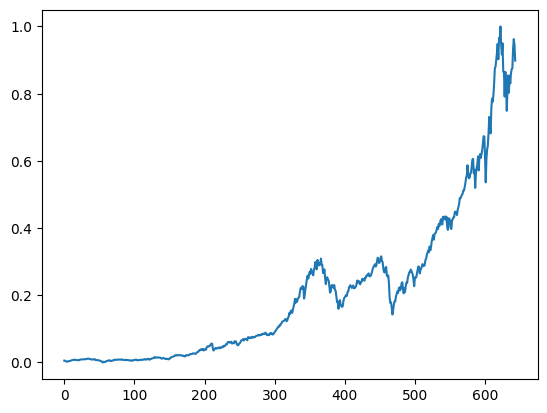

In [19]:
plt.plot(sp500_norm)

In [20]:
Xc= sm.add_constant(X)
Xc

,const,TB3MS,WTISPLC,PMSAVE
0,1.0,0.437078,0.000306,0.000000
1,1.0,0.406384,0.000306,0.001070
2,1.0,0.399018,0.000306,0.002411
3,1.0,0.419276,0.000306,0.001205
4,1.0,0.409454,0.000306,0.001120
...,...,...,...,...
639,1.0,0.314917,0.522661,0.165340
640,1.0,0.316145,0.512479,0.151775
641,1.0,0.321670,0.557036,0.136597
642,1.0,0.324739,0.597765,0.139772


###Step 4: Build the ols model

At this step, I created a variable for the full ols model. This is the linear correlation model with the S&P 500 price as a function of all variables.

As you can see in the article, their model shows that "personal savings has the highest coefficient which
means highest impact to model. [The] 3-month treasure bill has a negative impact to index price which means decreasing index price" (**Modelling of S&P 500 Index Price Based on U.S. Economic Indicators: Machine
Learning Approach**, pg. 8).

S & P 500 indexclose price = 0.2769 -0.4839 treasurebill + 0.2044 WTI + 1.2499 Personalsavings

The results in my simulation show:

S & P 500 indexclose price = 0.0792 - 0.2145 treasurebill + 0.4055 WTI + 1.1350 Personalsavings

The impact of the 3-month treasury bill on the S&P 500 index is lower than in the article, showing a decreased negative effect on the index price. To further analyze this, we should look at the differences in yields for the 3-month treasury bills over similar periods of time.

It's important to keep in mind that my model includes the Covid years, while the data range in the article is 1970-2020. Covid affected consumers and economies worldwide, which, in turn, had a significant effect on consumer behavior in the US, and on the US economy in general.

Covid dominated 2020, and continued to disrupt economic activities in 2021 and 2022. In an expanded exploratory analysis for these specific economic indicators, we could potentially delve into the significant fluctuations that took place between 2020 and January 2023 (when president Biden announced the end of the Covid emergency declarations).

The effect of the price of crude oil seems to have increased, compared to the figures from the article. Absent a parallel analysis of period-by-period oil price fluctuations, which would then be applied to a meticulous WTI-S&P 500 comparison, we can only guess the impact of the Covid-era disruptions on these numbers.

This higher WTI number has a more significant negative role in the values of the S&P 500 index in my simulation, indicating a decrease in the index price.

In [21]:
full_ols_model = sm.OLS(sp500_norm.Price, Xc, hasconst=True).fit()

In [22]:
print(full_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     387.0
Date:                Sat, 30 Mar 2024   Prob (F-statistic):          2.65e-143
Time:                        11:58:23   Log-Likelihood:                 361.02
No. Observations:                 644   AIC:                            -714.0
Df Residuals:                     640   BIC:                            -696.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0790      0.017      4.750      0.0

###Step 5: Showing full predictions

Using the calculated coefficients and calculated constant, we're arriving at the predictions which make up our final linear regression model.

This was done by taking each date within x to calculate the predicted y with its corresponding coefficients in the linear model.

We then plotted the predicted price versus their actual price for each date of the S&P 500.

In [23]:
full_predictions = full_ols_model.predict(Xc)
print(full_predictions)

0     -0.014500
1     -0.006707
2     -0.003601
3     -0.009313
4     -0.007307
         ...   
639    0.411387
640    0.391543
641    0.391079
642    0.410512
643    0.412346
Length: 644, dtype: float64


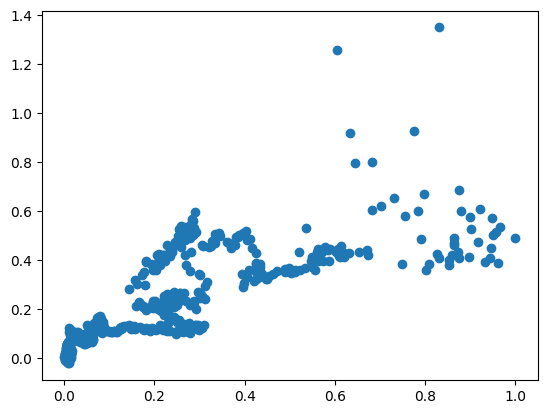

In [24]:
plt.scatter(sp500_norm, full_predictions)

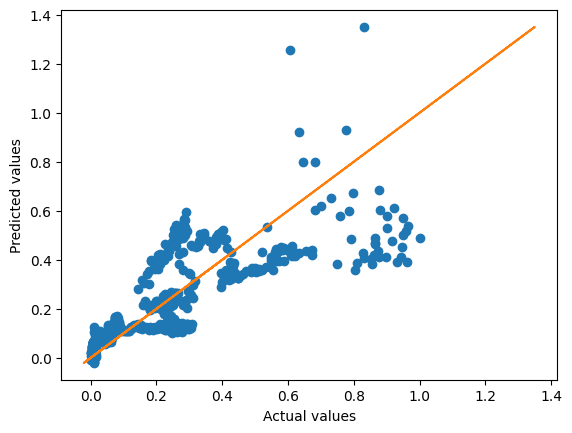

In [25]:
x = full_predictions
y = sp500_norm
# create a simple scatterplot
plt.plot(sp500_norm, full_predictions, "o")
# obtain the m (slope) and b(intercept) of the linear regression line
m, b = np.polyfit(x, y, 1)

# add a linear regression line to the scatterplot
plt.plot(x, m * x + b)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In the full_ols_model, the R-squared (uncentered) value was 0.643. In this agreement_ols_model, the R-squared (uncentered) value is 0.802.

The low numbers of these two values (lower than 0.99) makes me think that the 3 independent variables model doesn't achieve full correlation with the independent variable. There may be one other variable, or multiple, which may have a significant correlation with the S&P 500 index. Having an the R-squared (uncentered) value closer to 0.99 would show a more complete correlation.

That leads me to believe that maybe one, or several, of the other variables eliminated by the researchers would significantly impact the S&P 500.

As we know, the researchers themselves achieved higher accuracy with the ML methods. It would be interesting to see if using other linear regression calculations would bring the errors down, and match the R-squared high percentage correlation seen in the ML models. Some of the different methods to verify the OLS results would be QUANTREG, ADAPTIVEREG and TRANSREG (**Alternative methods of regression when OLS is not right**, https://support.sas.com/resources/papers/proceedings15/3412-2015.pdf).

In [26]:
agreement_ols_model = sm.OLS(full_predictions, sp500_norm, hasconst=False).fit()
print(agreement_ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              2621.
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                   5.18e-229
Time:                        11:58:24   Log-Likelihood:                          431.66
No. Observations:                 644   AIC:                                     -861.3
Df Residuals:                     643   BIC:                                     -856.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###Step 5: Final thoughts before exploratory attempts

Further analysis seems necessary to test the overlap between my model and the authors' model. Desirable steps would include:

* verifying data sources. The datasets the authors used may have been updated or even archived in the period between their data extraction (2020) and mine (2023).FRED may have specific notations and comments showing such alterations.
* starting with the exact same datasets would lead to a more succesful attemp to replicate their results accurately.
* conducting several accuracy tests and other types of tests to verify that their results were accurate in the first place, that their method is replicable and leads to the same results, and that all possible mistakes were identified and eliminated
* replicating the analysis at different points in time, by different researchers, to reinforce the statistical significance or lack of statistical significance of the findings in this paper.Different analysts may make different assumptions and handle the data differently, which might lead to different results.

Listed below are possible reasons why my results are different from the findings of the article:

* I used a longer time scale of raw data - 1970 to 2023, instead of 1970 to 2020

* There were events along that scale that may have skewed the data (like Covid), leading to deviations from norms of behavior: people sitting at home, investing more or less, saving more or less, online businesses replacing brick-and-mortar businesses, at least temporarily, and more.

* The presence of one or more mistakes in my analysis, or theirs (hence the need for further research).

* Difference in normalization, possibly.

###Exploratory analysis - data preparation

View all scatter plots for all possible combinations of chosen indicators.

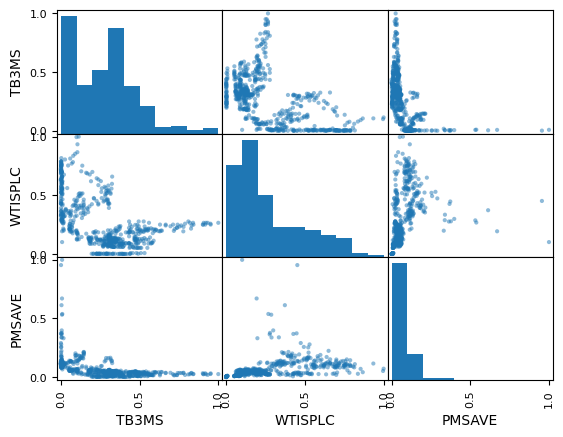

In [27]:
pd.plotting.scatter_matrix(X);

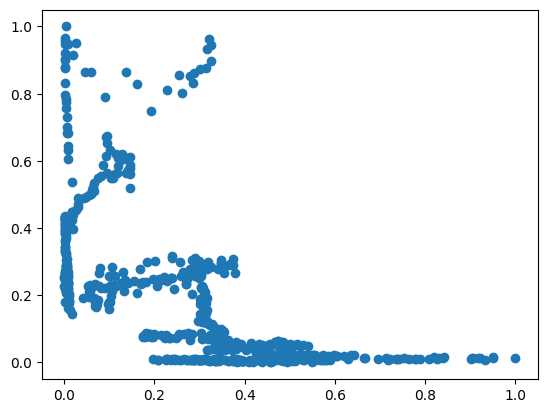

In [28]:
plt.scatter(X.TB3MS,sp500_norm.Price);

Use the OLS model to calculate a linear regression to calculate the correlation between S&P 500 and each of the three independent variables. For example, below we're exploring the prediction for S&P 500 given the independent variable TB3MS.

The paper only comments on individual variables but doesn't show a comparison between them.

In [29]:
ols_model_tbills = sm.OLS(sp500_norm.Price, X.TB3MS, hasconst=True).fit()
print(ols_model_tbills.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                      -0.684
Model:                            OLS   Adj. R-squared:                 -0.684
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                nan
Time:                        11:58:25   Log-Likelihood:                -139.88
No. Observations:                 644   AIC:                             281.8
Df Residuals:                     643   BIC:                             286.2
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TB3MS          0.2346      0.035      6.776      0.0

In [30]:
tbills_predictions = ols_model_tbills.predict(X.TB3MS)
print(tbills_predictions)

0      0.102554
1      0.095352
2      0.093624
3      0.098377
4      0.096072
         ...   
639    0.073891
640    0.074179
641    0.075475
642    0.076195
643    0.076483
Length: 644, dtype: float64


In [31]:
ols_model_WTI = sm.OLS(sp500_norm.Price, X.WTISPLC, hasconst=True).fit()
print(ols_model_WTI.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                nan
Time:                        11:58:25   Log-Likelihood:                 192.51
No. Observations:                 644   AIC:                            -383.0
Df Residuals:                     643   BIC:                            -378.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WTISPLC        0.7335      0.020     35.932      0.0

In [32]:
wti_predictions = ols_model_WTI.predict(X.WTISPLC)
print(wti_predictions)

0      0.000225
1      0.000225
2      0.000225
3      0.000225
4      0.000225
         ...   
639    0.383358
640    0.375889
641    0.408570
642    0.438444
643    0.483591
Length: 644, dtype: float64


In [33]:
ols_model_savings = sm.OLS(sp500_norm.Price, X.PMSAVE, hasconst=True).fit()
print(ols_model_savings.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 30 Mar 2024   Prob (F-statistic):                nan
Time:                        11:58:25   Log-Likelihood:                 163.28
No. Observations:                 644   AIC:                            -324.6
Df Residuals:                     643   BIC:                            -320.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PMSAVE         2.2213      0.066     33.515      0.0

In [34]:
savings_predictions = ols_model_savings.predict(X.PMSAVE)
print(savings_predictions)

0      0.000000
1      0.002376
2      0.005355
3      0.002677
4      0.002489
         ...   
639    0.367266
640    0.337135
641    0.303421
642    0.310473
643    0.266050
Length: 644, dtype: float64


In the next line, we wanted to see if the S&P 500 index is going up or down, and how strongly, in relation to the WTI. Note that the points are quite scattered, indicating a weaker correlation.

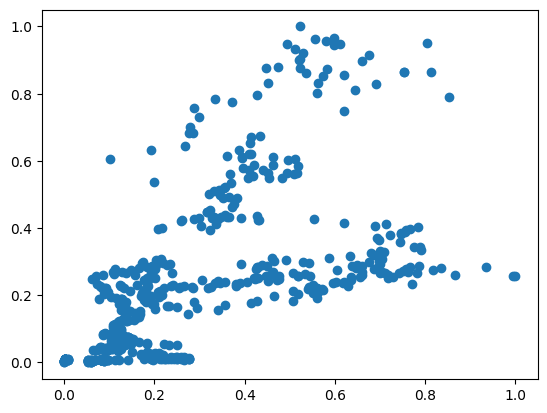

In [35]:
plt.scatter(X.WTISPLC,sp500_norm);

For personal savings though, the image below shows a tighter fit, and more concentration, indicating a possible stronger correlation between the PMSAVE and the S&P 500 index, unlike the WTI.

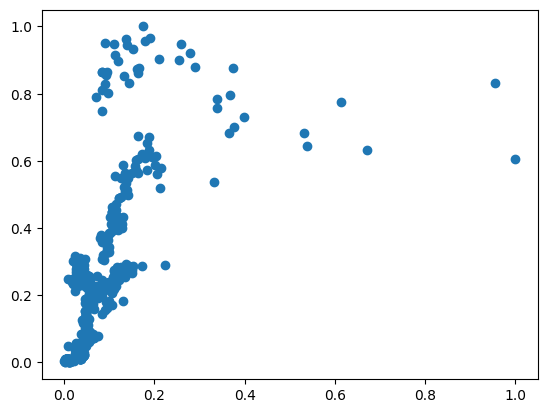

In [36]:
plt.scatter(X.PMSAVE,sp500_norm);

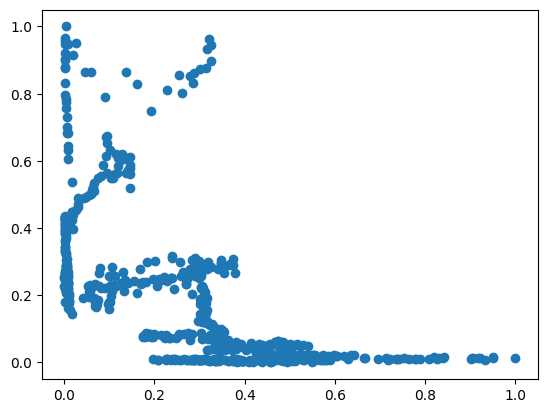

In [37]:
plt.scatter(X.TB3MS,sp500_norm);

For exploratory analysis of the correlation between the dependent variable and the independent variables, we could try using gradient descent or anova/ancova methods.

To explain their choice of analyzing only the WTI, savings and 3-month treasury bills as independent variables out of 27, the authors stated that 11 of them didn't meet the linear regression rule that the data should be linear. For the remaining 16, they did further analysis:

"The next step in the second stage was to [see] if independent
variables did not correlate with each other. The VIF test
was chosen for this purpose. A VIF values between 5 and
10 indicates high correlation that may be problematic. And
if the VIF goes above 10, you can assume that the
regression coefficients are poorly estimated due to
multicollinearity. Thus, our aim was to leave those
indicators below which VIF values do not exceed 5."

To verify all of these claims, we could start a new analysis with all 27 variables, and eliminate them one by one, based on the R-squared value. Or start with just the 3, build the model, check the R-squared value, and keep the new variable in the model if it improves the R-squared value.

An 0.802 value for R-squared shows a large positive linear association, so the article's claims may not be wrong. Further analysis would help us understand the difference between the R-squared values in the OLS model and the R-squared values in the ML models, shown in the "Models Summary" table from the article (Table 12).
(R-squared info: https://condor.depaul.edu/sjost/it223/documents/correlation.htm#:~:text=The%20R%2Dsquared%20value%2C%20denoted,between%200%20and%201%20inclusive)